# Лабораторная работа №1.

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

##  Part 2. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

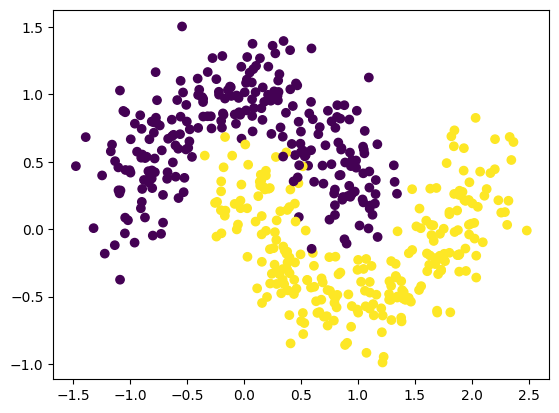

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

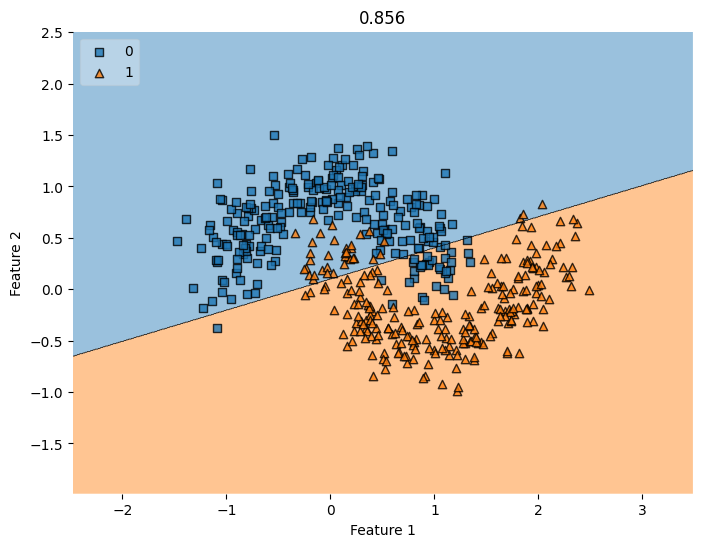

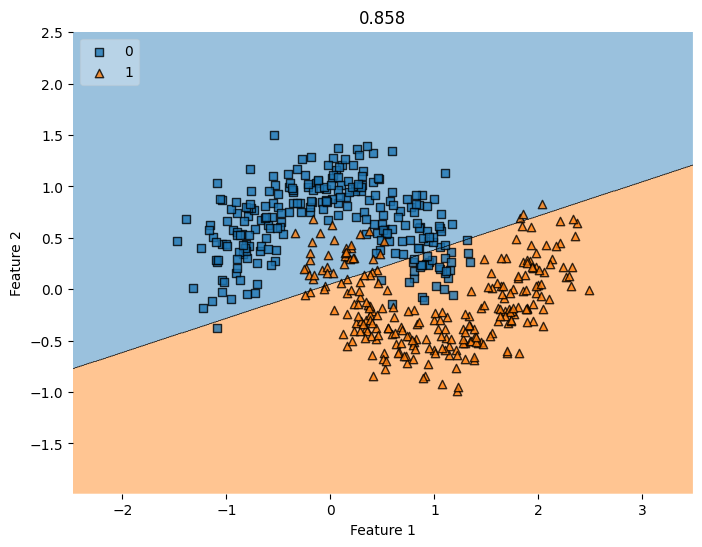

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

def plot_decisions(X, y, estimator, title):
    """
    Plot decision regions for a given estimator

    Parameters:
    X: feature matrix
    y: target labels
    estimator: trained classifier
    title: plot title
    """
    plt.figure(figsize=(8, 6))

    # Plot decision regions
    plot_decision_regions(X, y, clf=estimator, legend=2)

    # Customize plot
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

lr = LogisticRegression(C=1.0, max_iter=1000, random_state=42) # add some params
svm = SVC(kernel='linear') # here too
lr.fit(moons_points, moons_labels)
moons_preds_lr = lr.predict(moons_points)
lr_accuracy = accuracy_score(moons_labels, moons_preds_lr)


svm.fit(moons_points, moons_labels)
moons_preds_svm = svm.predict(moons_points)
svm_accuracy = accuracy_score(moons_labels, moons_preds_svm)


plot_decisions(moons_points, moons_labels, lr, lr_accuracy)
plot_decisions(moons_points, moons_labels, svm, svm_accuracy)

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

POLYNOMIAL KERNEL EVALUATION


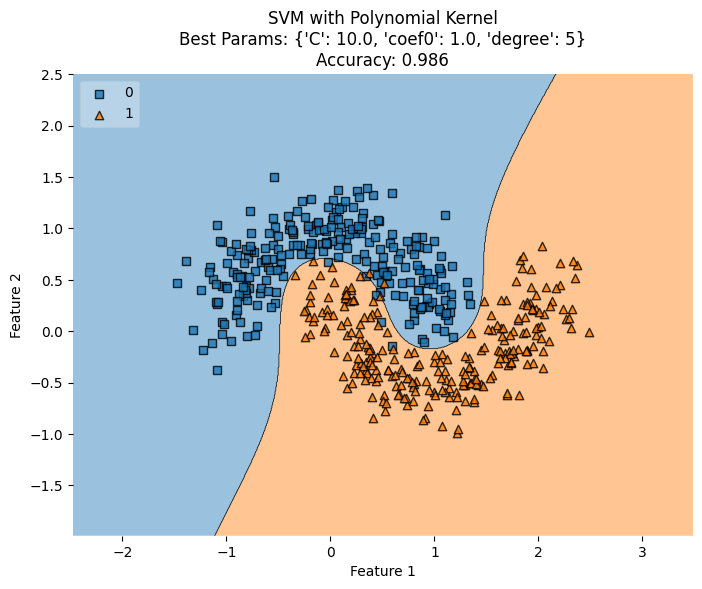


POLY Kernel Results:
Best Parameters: {'C': 10.0, 'coef0': 1.0, 'degree': 5}
Best CV Accuracy: 0.978
Training Accuracy: 0.986
--------------------------------------------------

RBF KERNEL EVALUATION


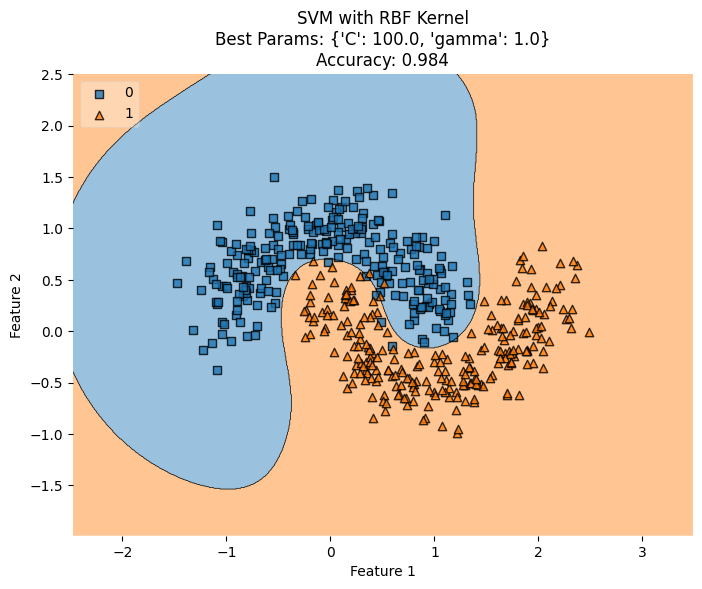


RBF Kernel Results:
Best Parameters: {'C': 100.0, 'gamma': 1.0}
Best CV Accuracy: 0.980
Training Accuracy: 0.984
--------------------------------------------------

SIGMOID KERNEL EVALUATION


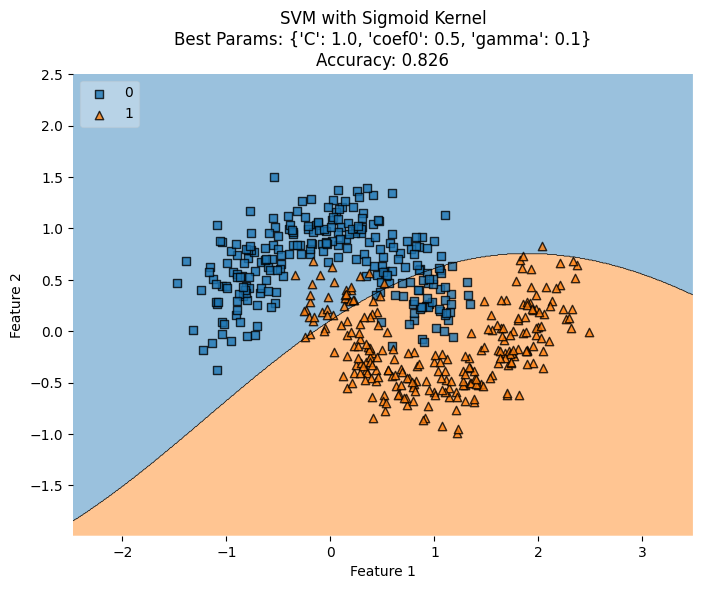


SIGMOID Kernel Results:
Best Parameters: {'C': 1.0, 'coef0': 0.5, 'gamma': 0.1}
Best CV Accuracy: 0.844
Training Accuracy: 0.826
--------------------------------------------------

COMPARISON OF ALL KERNELS


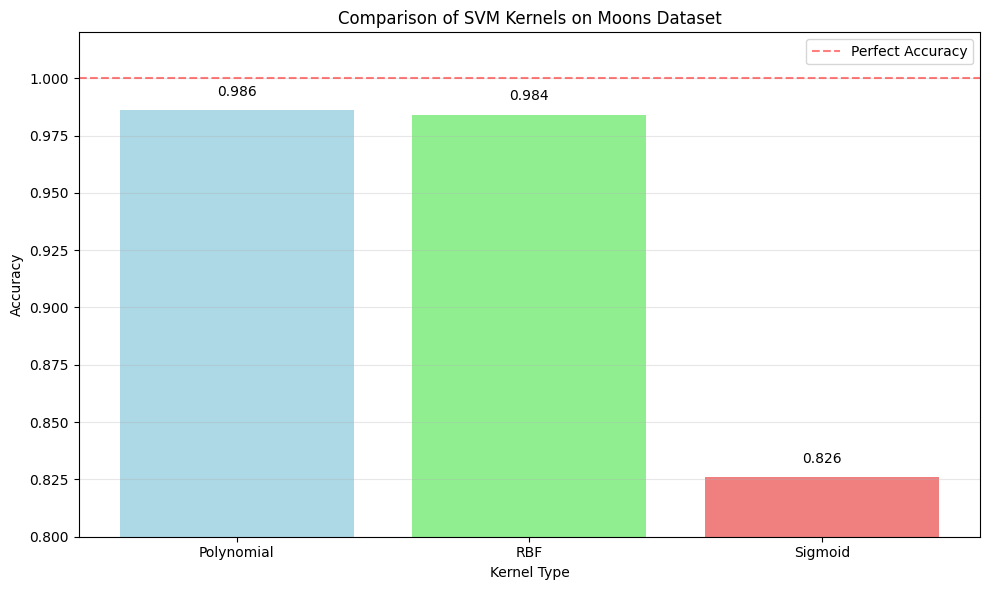


SUMMARY:
----------------------------------------
Linear Kernel:      Accuracy = 0.858
Polynomial Kernel:  Accuracy = 0.986 (degree=5)
RBF Kernel:         Accuracy = 0.984
Sigmoid Kernel:     Accuracy = 0.826


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Function for hyperparameter tuning and visualization
def evaluate_svm_kernel(kernel_name, param_grid, title_prefix):
    """
    Evaluate SVM with different kernels and visualize results
    """
    # Perform grid search
    svm = SVC(kernel=kernel_name, random_state=42)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(moons_points, moons_labels)

    # Get best estimator
    best_svm = grid_search.best_estimator_

    # Calculate accuracy
    svm_predictions = best_svm.predict(moons_points)
    svm_accuracy = accuracy_score(moons_labels, svm_predictions)

    # Plot decision regions
    plt.figure(figsize=(8, 6))
    plot_decision_regions(moons_points, moons_labels, clf=best_svm, legend=2)
    plt.title(f'{title_prefix}\nBest Params: {grid_search.best_params_}\nAccuracy: {svm_accuracy:.3f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Print detailed results
    print(f"\n{kernel_name.upper()} Kernel Results:")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best CV Accuracy: {grid_search.best_score_:.3f}")
    print(f"Training Accuracy: {svm_accuracy:.3f}")
    print("-" * 50)

    return best_svm, grid_search.best_params_, svm_accuracy

# 1. Polynomial Kernel
print("=" * 60)
print("POLYNOMIAL KERNEL EVALUATION")
print("=" * 60)

poly_param_grid = {
    'degree': [2, 3, 4, 5],
    'C': [0.1, 1.0, 10.0],
    'coef0': [0.0, 1.0, 2.0]
}

best_poly, best_poly_params, poly_acc = evaluate_svm_kernel(
    'poly', poly_param_grid, 'SVM with Polynomial Kernel'
)

# 2. RBF Kernel (Radial Basis Function)
print("\n" + "=" * 60)
print("RBF KERNEL EVALUATION")
print("=" * 60)

rbf_param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'gamma': ['scale', 'auto', 0.1, 1.0, 10.0]
}

best_rbf, best_rbf_params, rbf_acc = evaluate_svm_kernel(
    'rbf', rbf_param_grid, 'SVM with RBF Kernel'
)

# 3. Sigmoid Kernel
print("\n" + "=" * 60)
print("SIGMOID KERNEL EVALUATION")
print("=" * 60)

sigmoid_param_grid = {
    'C': [0.1, 1.0, 10.0],
    'gamma': ['scale', 'auto', 0.1, 1.0],
    'coef0': [0.0, 0.5, 1.0]
}

best_sigmoid, best_sigmoid_params, sigmoid_acc = evaluate_svm_kernel(
    'sigmoid', sigmoid_param_grid, 'SVM with Sigmoid Kernel'
)

# Compare all kernels
print("\n" + "=" * 60)
print("COMPARISON OF ALL KERNELS")
print("=" * 60)

# Create comparison table
kernels = ['Polynomial', 'RBF', 'Sigmoid']
accuracies = [poly_acc, rbf_acc, sigmoid_acc]

plt.figure(figsize=(10, 6))
bars = plt.bar(kernels, accuracies, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='Perfect Accuracy')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernels on Moons Dataset')
plt.ylim(0.8, 1.02)

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.3f}', ha='center', va='bottom')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\nSUMMARY:")
print("-" * 40)
print(f"Linear Kernel:      Accuracy = {svm_accuracy:.3f}")
print(f"Polynomial Kernel:  Accuracy = {poly_acc:.3f} (degree={best_poly_params.get('degree', 'N/A')})")
print(f"RBF Kernel:         Accuracy = {rbf_acc:.3f}")
print(f"Sigmoid Kernel:     Accuracy = {sigmoid_acc:.3f}")

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

LOGISTIC REGRESSION WITH POLYNOMIAL FEATURES

Evaluating Polynomial Degree 2:
----------------------------------------
Number of generated features: 5
Training Accuracy: 0.860


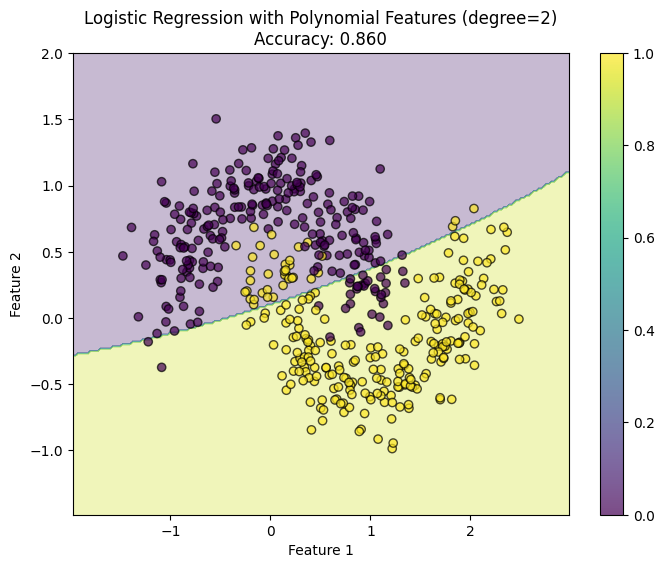


Evaluating Polynomial Degree 3:
----------------------------------------
Number of generated features: 9
Training Accuracy: 0.974


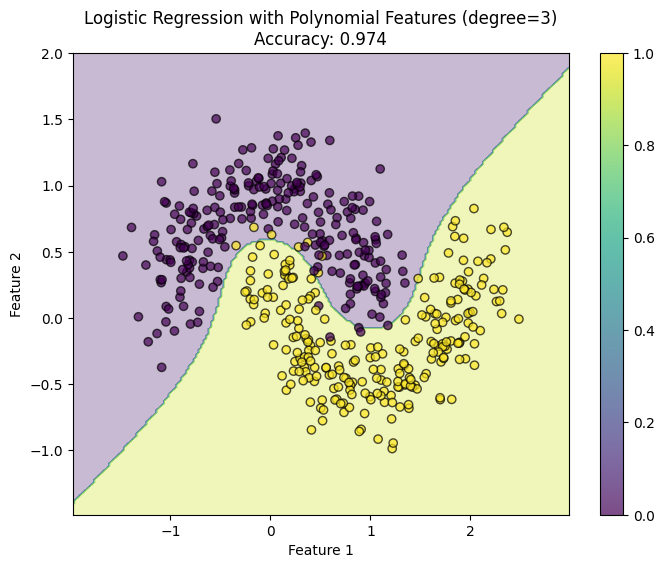


Evaluating Polynomial Degree 4:
----------------------------------------
Number of generated features: 14
Training Accuracy: 0.974


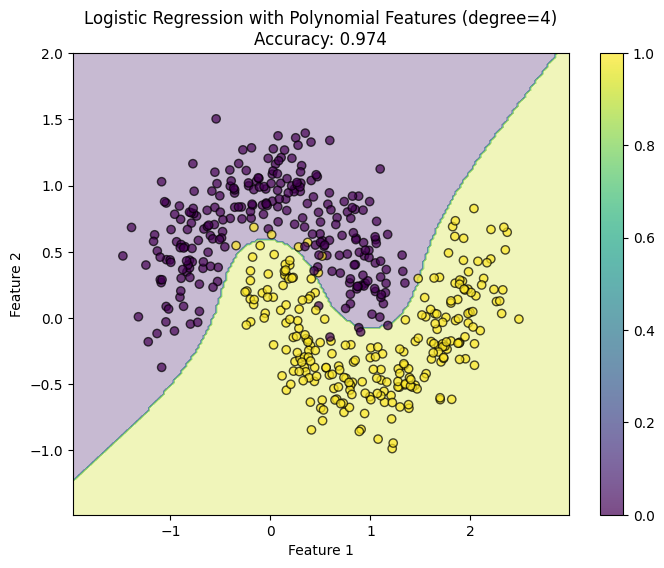


Evaluating Polynomial Degree 5:
----------------------------------------
Number of generated features: 20
Training Accuracy: 0.982


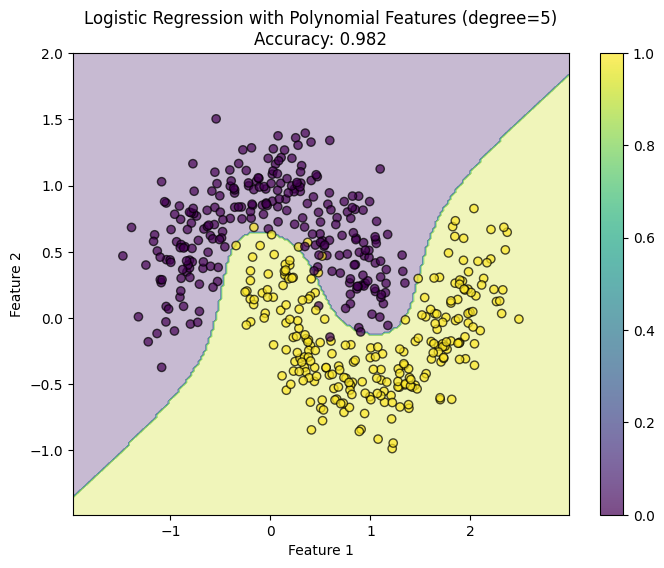


COMPARISON: POLYNOMIAL FEATURES vs SVM KERNELS

Best Logistic Regression (Polynomial Features):
  Degree: 5
  Accuracy: 0.982
  Number of features generated: 20

Best SVM Polynomial Kernel:
  Degree: 5
  Accuracy: 0.986

Best SVM RBF Kernel:
  Accuracy: 0.984

SIDE-BY-SIDE COMPARISON


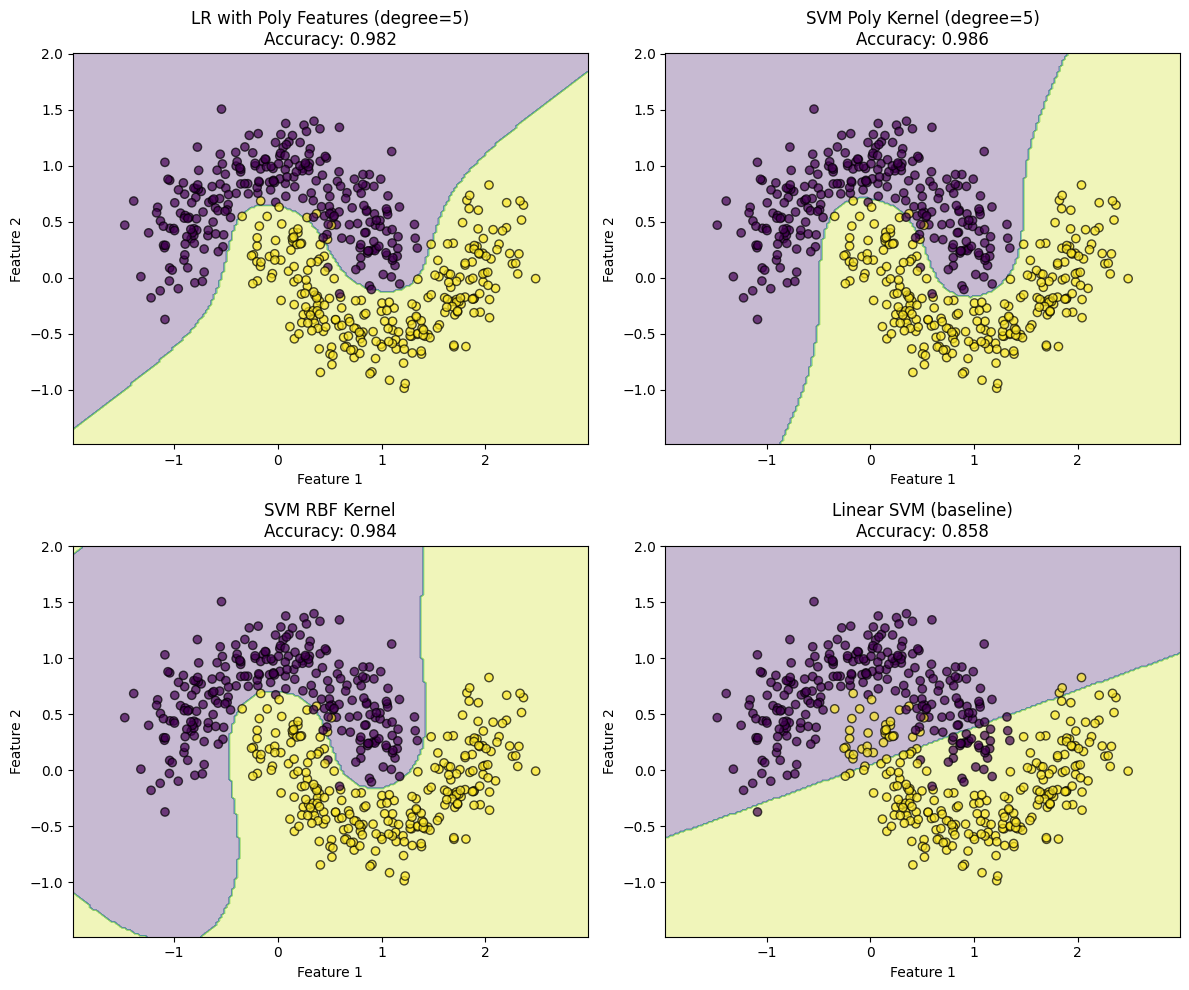


FEATURE IMPORTANCE ANALYSIS

Polynomial features generated (degree=3):
  Feature 1: x1
  Feature 2: x2
  Feature 3: x1^2
  Feature 4: x1 x2
  Feature 5: x2^2
  Feature 6: x1^3
  Feature 7: x1^2 x2
  Feature 8: x1 x2^2
  Feature 9: x2^3

Total features: 9
(Original features + interactions + higher-degree terms)


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Function to evaluate Logistic Regression with polynomial features
def evaluate_logistic_poly(degree, X_train, y_train):
    """
    Evaluate Logistic Regression with polynomial feature expansion
    """
    # Create pipeline with scaling, polynomial features, and logistic regression
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lr', LogisticRegression(C=1.0, max_iter=1000, random_state=42))
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Get accuracy
    predictions = pipeline.predict(X_train)
    accuracy = accuracy_score(y_train, predictions)

    return pipeline, accuracy

# Function to plot decision regions for pipeline models
def plot_pipeline_decisions(X, y, pipeline, title):
    """
    Plot decision regions for pipeline models
    """
    plt.figure(figsize=(8, 6))

    # Create mesh grid for decision boundary visualization
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict on mesh grid
    Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Plot original data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis',
                         edgecolors='k', alpha=0.7)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(scatter)
    plt.show()

# Test different polynomial degrees for Logistic Regression
print("=" * 60)
print("LOGISTIC REGRESSION WITH POLYNOMIAL FEATURES")
print("=" * 60)

degrees_to_test = [2, 3, 4, 5]
results = {}

for degree in degrees_to_test:
    print(f"\nEvaluating Polynomial Degree {degree}:")
    print("-" * 40)

    # Create and evaluate pipeline
    pipeline, accuracy = evaluate_logistic_poly(degree, moons_points, moons_labels)

    # Store results
    results[degree] = {
        'pipeline': pipeline,
        'accuracy': accuracy,
        'num_features': pipeline.named_steps['poly'].n_output_features_
    }

    # Print results
    print(f"Number of generated features: {results[degree]['num_features']}")
    print(f"Training Accuracy: {accuracy:.3f}")

    # Plot decision regions
    plot_pipeline_decisions(moons_points, moons_labels, pipeline,
                          f'Logistic Regression with Polynomial Features (degree={degree})\nAccuracy: {accuracy:.3f}')

# Compare with SVM kernels
print("\n" + "=" * 60)
print("COMPARISON: POLYNOMIAL FEATURES vs SVM KERNELS")
print("=" * 60)

# Best degree for Logistic Regression
best_lr_degree = max(results.items(), key=lambda x: x[1]['accuracy'])
print(f"\nBest Logistic Regression (Polynomial Features):")
print(f"  Degree: {best_lr_degree[0]}")
print(f"  Accuracy: {best_lr_degree[1]['accuracy']:.3f}")
print(f"  Number of features generated: {best_lr_degree[1]['num_features']}")

print(f"\nBest SVM Polynomial Kernel:")
print(f"  Degree: {best_poly_params.get('degree', 'N/A')}")
print(f"  Accuracy: {poly_acc:.3f}")

print(f"\nBest SVM RBF Kernel:")
print(f"  Accuracy: {rbf_acc:.3f}")

# Visual comparison of decision boundaries
print("\n" + "=" * 60)
print("SIDE-BY-SIDE COMPARISON")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Logistic Regression with Polynomial Features (degree=3)
ax = axes[0, 0]
x_min, x_max = moons_points[:, 0].min() - 0.5, moons_points[:, 0].max() + 0.5
y_min, y_max = moons_points[:, 1].min() - 0.5, moons_points[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Best LR model
best_lr_model = results[best_lr_degree[0]]['pipeline']
Z = best_lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
ax.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels,
           cmap='viridis', edgecolors='k', alpha=0.7)
ax.set_title(f'LR with Poly Features (degree={best_lr_degree[0]})\nAccuracy: {best_lr_degree[1]["accuracy"]:.3f}')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

# Plot 2: SVM Polynomial Kernel
ax = axes[0, 1]
Z = best_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
ax.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels,
           cmap='viridis', edgecolors='k', alpha=0.7)
ax.set_title(f'SVM Poly Kernel (degree={best_poly_params.get("degree", "N/A")})\nAccuracy: {poly_acc:.3f}')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')



plt.tight_layout()
plt.show()

# Feature importance analysis for polynomial features
print("\n" + "=" * 60)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature names for degree=3 polynomial
poly_transformer = PolynomialFeatures(degree=3, include_bias=False)
poly_transformer.fit(moons_points)
feature_names = poly_transformer.get_feature_names_out(['x1', 'x2'])

print(f"\nPolynomial features generated (degree=3):")
for i, feature in enumerate(feature_names):
    print(f"  Feature {i+1}: {feature}")

print(f"\nTotal features: {len(feature_names)}")
print("(Original features + interactions + higher-degree terms)")

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

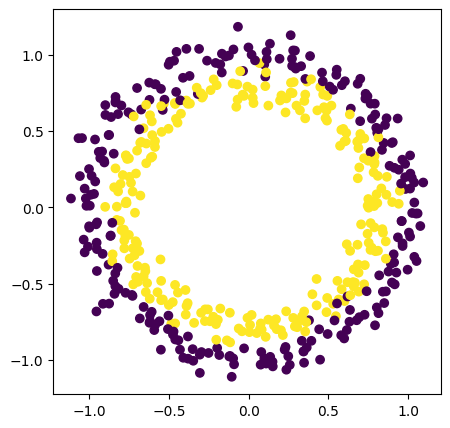

In [6]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

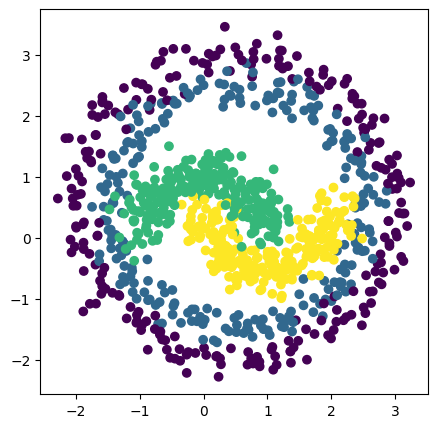

In [8]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

0.921


/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edg

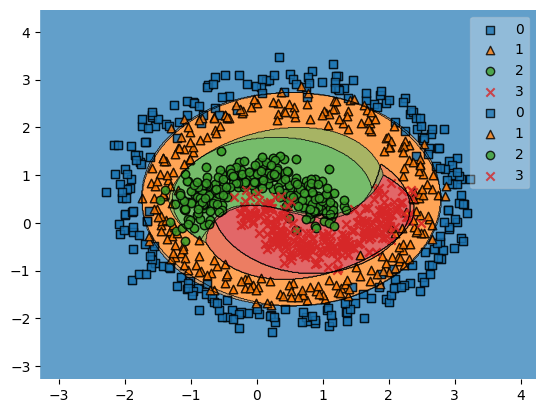

3 0.921


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


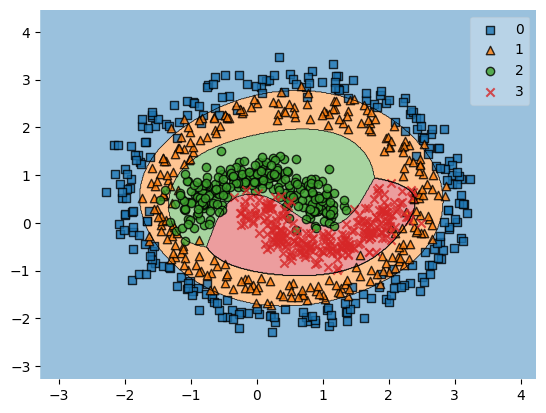

4 0.939


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


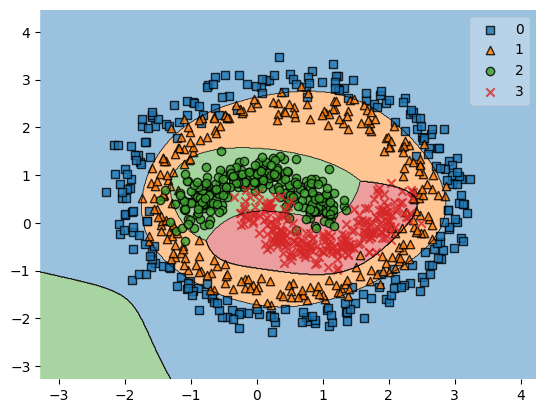

5 0.913


In [13]:
svm = SVC(
    kernel='rbf',
    random_state=42
)
svm.fit(points, labels)
labels_pred = svm.predict(points)

svm_accuracy = accuracy_score(labels, labels_pred)
print(svm_accuracy)
plot_decision_regions(points, labels, svm)


def func(i):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=i, include_bias=False)),
        ('lr', LogisticRegression(random_state=42))
    ])
    pipeline.fit(points, labels)
    labels_pred = pipeline.predict(points)
    pipe_accuracy = accuracy_score(labels, labels_pred)
    plot_decision_regions(points, labels, pipeline)
    plt.show()
    print(i, pipe_accuracy)


for i in [3, 4, 5]:
    func(i)